In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000]  # select a subset of data
transformer = QuantileTransformer(output_distribution='normal')
regressor = LinearRegression()
regr = TransformedTargetRegressor(regressor=regressor,
                                  transformer=transformer)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)

print('R2 score: {0:.2f}'.format(regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score: {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

R2 score: 0.61
R2 score: 0.59


In [10]:
lcX = np.load("None_Or_One_Exoplanet_NORMALISED.npy")
lcY = np.load("None_Or_One_isplanetlist.npy")

In [3]:
shortX = np.array([x[::25] for x in lcX])

In [15]:
# Time to see if I can make a transformer work on my data

X_train2, X_test2, y_train2, y_test2 = train_test_split(shortX, lcY, random_state=0)
regr.fit(shortX,lcY)
print('R2 score: {0:.2f}'.format(regr.score(X_test2, y_test2)))

raw_target_regr = LinearRegression().fit(X_train2, y_train2)
print('R2 score: {0:.2f}'.format(raw_target_regr.score(X_test2, y_test2)))

R2 score: -0.22
R2 score: -122.85


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test2, y_pred)
pre = precision_score(y_test2, y_pred)
rec = recall_score(y_test2, y_pred)

print(f"Accuracy: {acc}\nPrecision: {pre}\nRecall: {rec}")

NameError: name 'y_pred' is not defined

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

def MyFunc(x):
    return [3*n for n in x]

def FixZeros(x):
    med = np.median(x)
    return [med if n==0 else n for n in x]

transSQUARE = FunctionTransformer(MyFunc)
transFIXZERO= FunctionTransformer(FixZeros)

pipe = Pipeline(steps=[
     ('fix', transFIXZERO),
     ('sqr', transSQUARE)
])

X = np.array([[0, 1], [2, 3]])
transformer.transform(X)

array([[0, 1],
       [4, 9]])

In [28]:
Z = shortX[0]

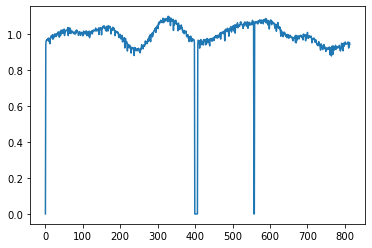

In [29]:
plt.plot(Z)

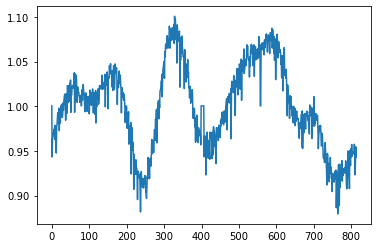

In [30]:
plt.plot(FixZeros(Z))

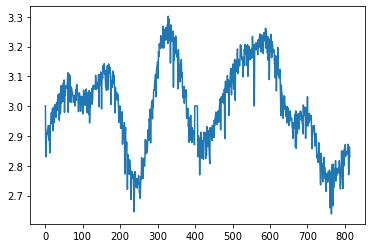

In [45]:
plt.plot(pipe.transform(Z))